In [1]:
from g4beam import *
from scan import *

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import numpy as np
import pandas as pd
from tqdm import *
import pickle
import itertools
from tabulate import tabulate

In [14]:
t_emit = 0.110  # mm
momentum = 80  # MeV/c
beta = 0.03    # m
alpha = 1.0     # dimensionless
l_emit = 1      # mm
pz_std = 0.8    # MeV/c
vd_dist = 24    # mm

part_1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=25000)
part_1["PDGid"] = -13
part_2 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=25000)
combined = pd.concat([part_1, part_2])

In [15]:
write_trackfile(combined, "particles_before.txt", "particles_before")

In [16]:
after=read_trackfile("particles_after.txt")

In [20]:
after_neg = after[after["PDGid"]==13]
after_pos = after[after["PDGid"]==-13]

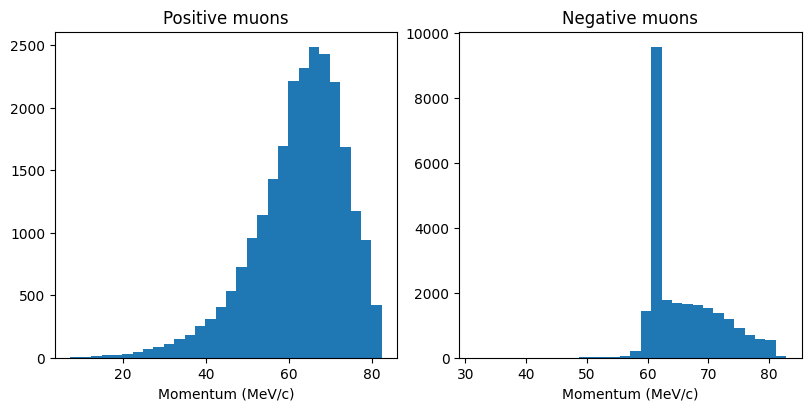

In [33]:
fig, [ax1, ax2] = plt.subplots(ncols=2, layout="constrained")
ax1.hist(p_total(after_pos), bins=30)
ax1.set_title("Positive muons")
ax1.set_xlabel("Momentum (MeV/c)")
ax2.hist(p_total(after_neg), bins=30)
ax2.set_title("Negative muons")
ax2.set_xlabel("Momentum (MeV/c)")
fig.set_size_inches(8, 4)